# HISTORY

#### Vehicle Detection Image Set

* This dataset is for machine learning process and computer vision steps.

Two labels:

* Non-Vehicles
* Vehicles

17760 images

# PACKAGES AND LIBRARIES

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import itertools
from skimage import data, io, filters
import skimage
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH AND LABEL PROCESS

#### MAIN PATH

In [2]:
Main_PNG_Path = Path("../input/vehicle-detection-image-set/data")

#### PNG PATH

In [3]:
PNG_Path = list(Main_PNG_Path.glob(r"*/*.png"))

#### PNG LABELS

In [4]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

#### TO SERIES

In [5]:
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

#### TO DATAFRAME

In [6]:
Main_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [7]:
print(Main_Data.head(-1))

                                                     PNG      CATEGORY
0      ../input/vehicle-detection-image-set/data/vehi...      vehicles
1      ../input/vehicle-detection-image-set/data/vehi...      vehicles
2      ../input/vehicle-detection-image-set/data/vehi...      vehicles
3      ../input/vehicle-detection-image-set/data/vehi...      vehicles
4      ../input/vehicle-detection-image-set/data/vehi...      vehicles
...                                                  ...           ...
17754  ../input/vehicle-detection-image-set/data/non-...  non-vehicles
17755  ../input/vehicle-detection-image-set/data/non-...  non-vehicles
17756  ../input/vehicle-detection-image-set/data/non-...  non-vehicles
17757  ../input/vehicle-detection-image-set/data/non-...  non-vehicles
17758  ../input/vehicle-detection-image-set/data/non-...  non-vehicles

[17759 rows x 2 columns]


#### REPLACING VALUE NAME

In [8]:
Main_Data["CATEGORY"].replace({"non-vehicles":"no_vehicles"},inplace=True)

In [9]:
print(Main_Data.head(-1))

                                                     PNG     CATEGORY
0      ../input/vehicle-detection-image-set/data/vehi...     vehicles
1      ../input/vehicle-detection-image-set/data/vehi...     vehicles
2      ../input/vehicle-detection-image-set/data/vehi...     vehicles
3      ../input/vehicle-detection-image-set/data/vehi...     vehicles
4      ../input/vehicle-detection-image-set/data/vehi...     vehicles
...                                                  ...          ...
17754  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17755  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17756  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17757  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17758  ../input/vehicle-detection-image-set/data/non-...  no_vehicles

[17759 rows x 2 columns]


#### SHUFFLING

In [10]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

In [11]:
print(Main_Data.head(-1))

                                                     PNG     CATEGORY
0      ../input/vehicle-detection-image-set/data/non-...  no_vehicles
1      ../input/vehicle-detection-image-set/data/non-...  no_vehicles
2      ../input/vehicle-detection-image-set/data/vehi...     vehicles
3      ../input/vehicle-detection-image-set/data/non-...  no_vehicles
4      ../input/vehicle-detection-image-set/data/vehi...     vehicles
...                                                  ...          ...
17754  ../input/vehicle-detection-image-set/data/vehi...     vehicles
17755  ../input/vehicle-detection-image-set/data/vehi...     vehicles
17756  ../input/vehicle-detection-image-set/data/vehi...     vehicles
17757  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17758  ../input/vehicle-detection-image-set/data/non-...  no_vehicles

[17759 rows x 2 columns]


# VISUALIZATION

In [12]:
plt.style.use("classic")

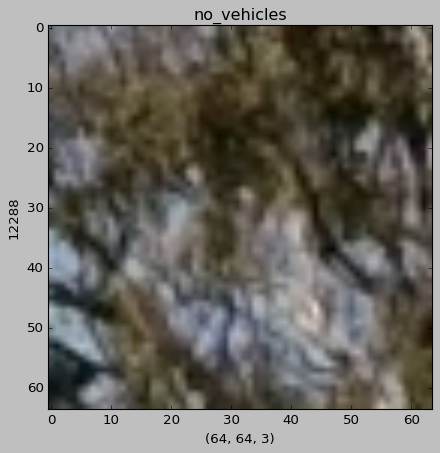

In [13]:
Example_I = cv2.imread(Main_Data["PNG"][44])
Example_I = cv2.cvtColor(Example_I,cv2.COLOR_BGR2RGB)
plt.xlabel(Example_I.shape)
plt.ylabel(Example_I.size)
plt.title(Main_Data["CATEGORY"][44])
plt.imshow(Example_I)

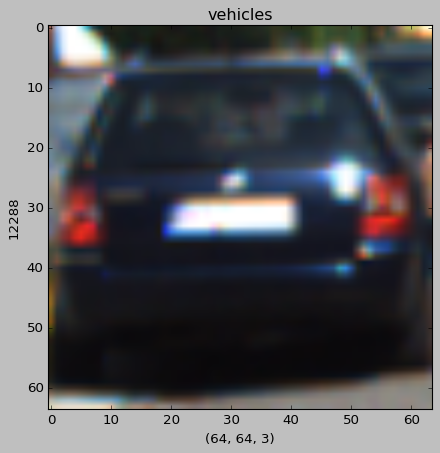

In [14]:
Example_I = cv2.imread(Main_Data["PNG"][2])
Example_I = cv2.cvtColor(Example_I,cv2.COLOR_BGR2RGB)
plt.xlabel(Example_I.shape)
plt.ylabel(Example_I.size)
plt.title(Main_Data["CATEGORY"][2])
plt.imshow(Example_I)

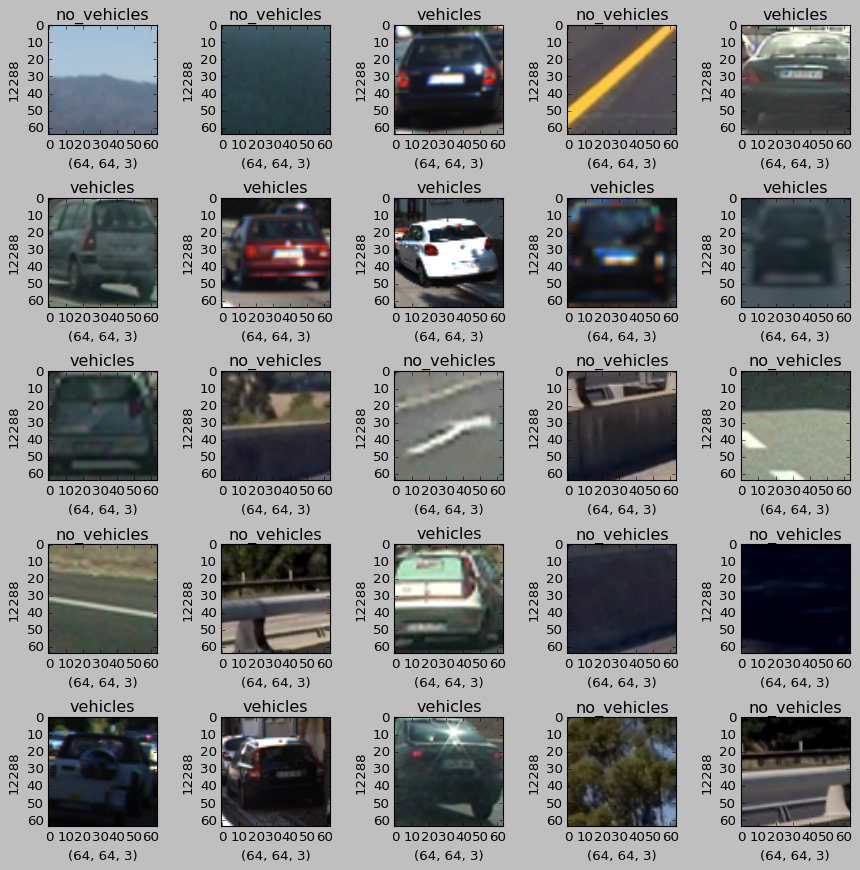

In [15]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = Main_Data["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(Main_Data["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

In [16]:
Non_V_Img = Main_Data[Main_Data["CATEGORY"] == "no_vehicles"]
V_Img = Main_Data[Main_Data["CATEGORY"] == "vehicles"]

Non_V_Img = Non_V_Img.reset_index()
V_Img = V_Img.reset_index()

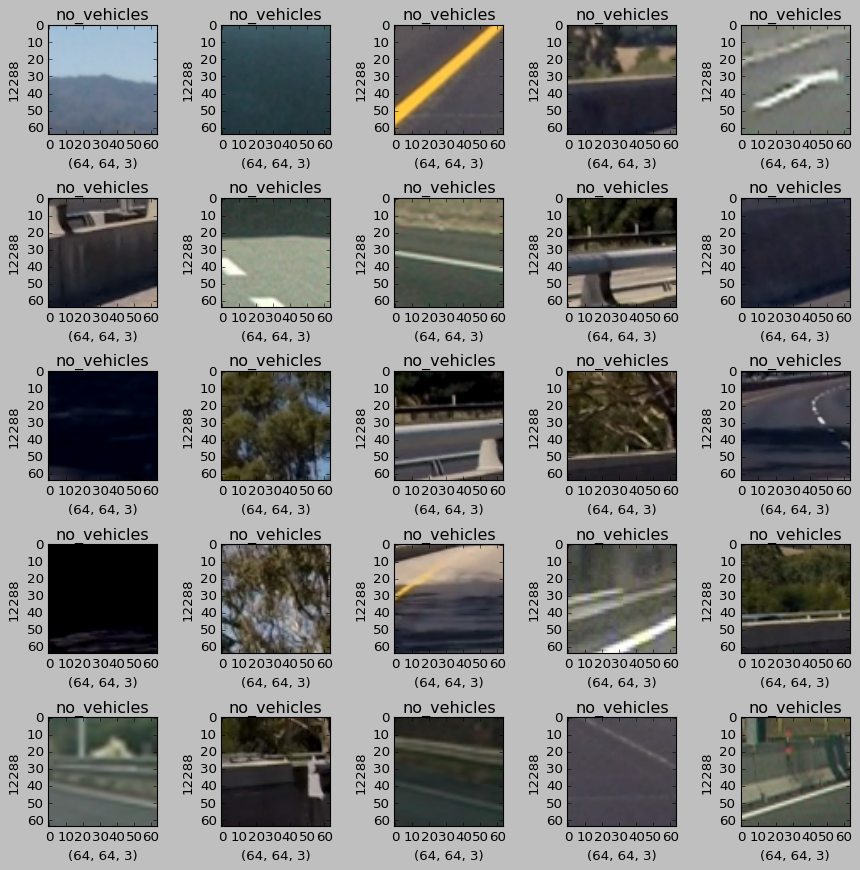

In [17]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = Non_V_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(Non_V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

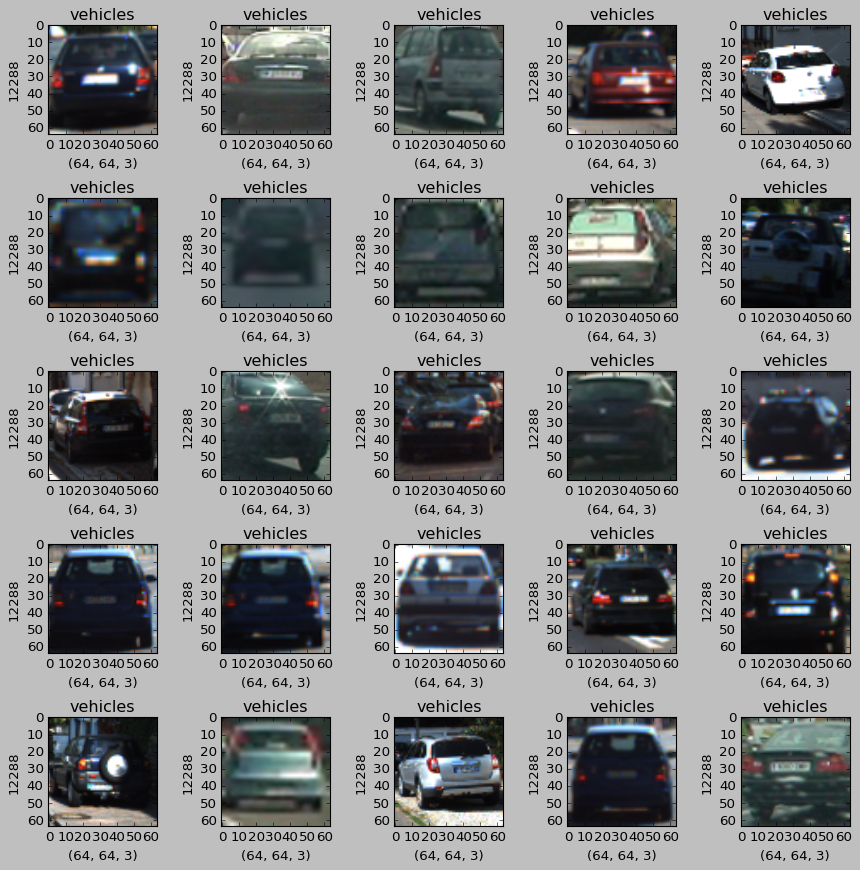

In [18]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = V_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

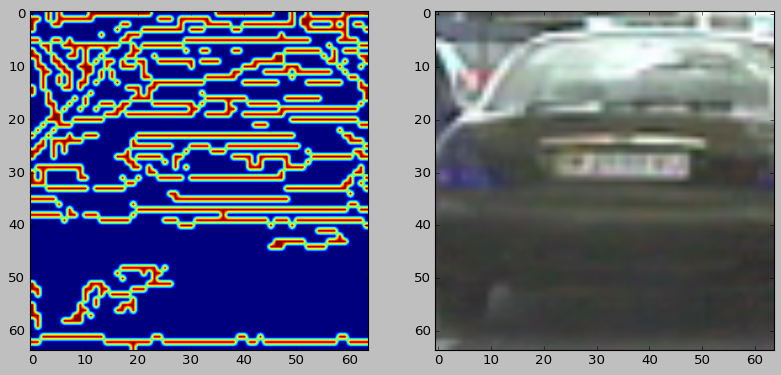

In [19]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][1])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

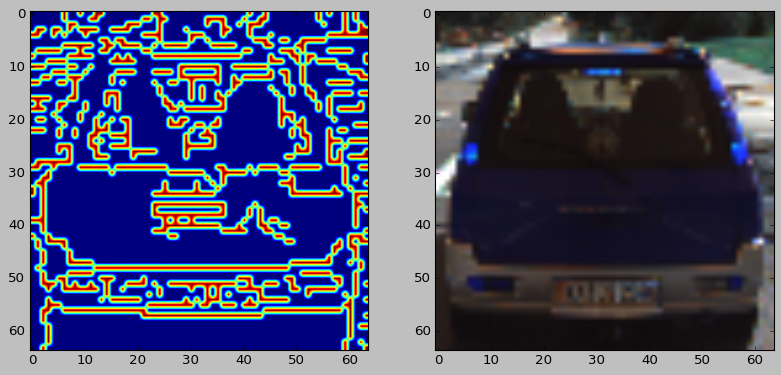

In [20]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][100])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

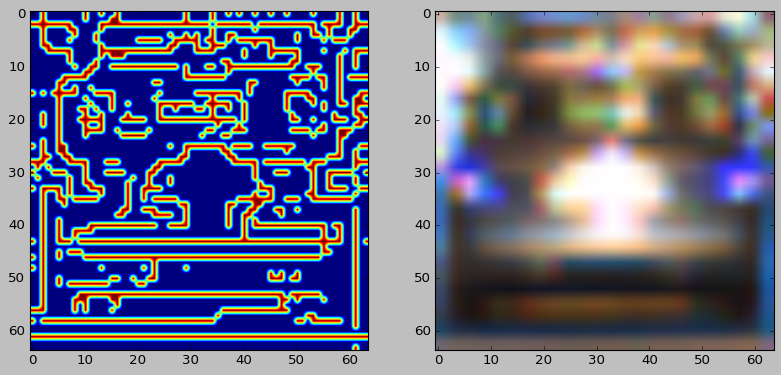

In [21]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][147])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

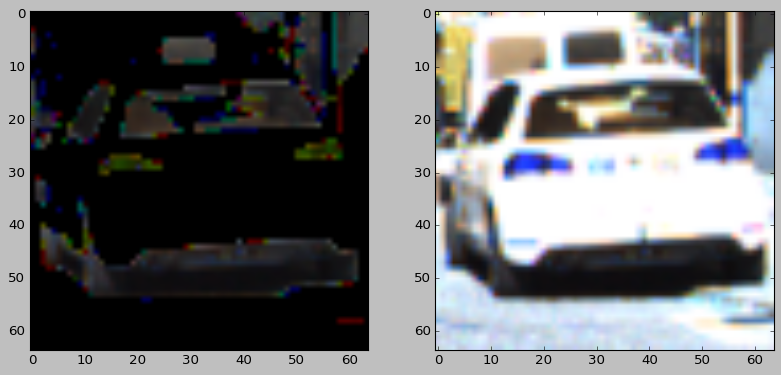

In [22]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][47])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)


axis[0].imshow(Threshold_I)
axis[1].imshow(E_IMG)

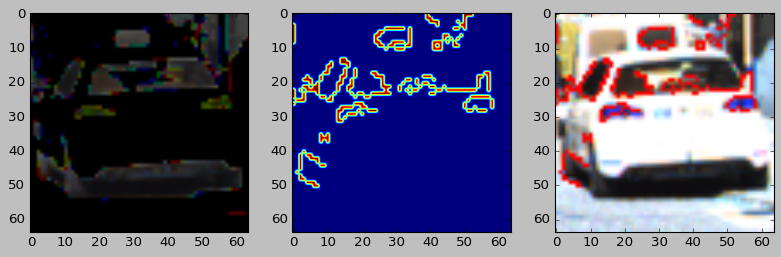

In [23]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][47])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(Threshold_I,90,450)
contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Img = cv2.drawContours(E_IMG,contours,-1,(255,0,0),1)


axis[0].imshow(Threshold_I)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

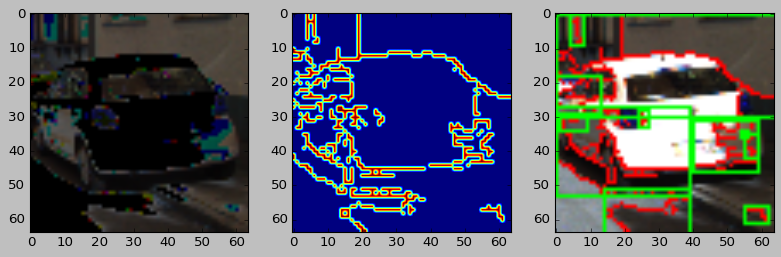

In [24]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][4])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(Threshold_I,90,450)
contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Img = cv2.drawContours(E_IMG,contours,-1,(255,0,0),1)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(Draw_Img,(x,y),(x+w,y+h),(0,255,0),1)

axis[0].imshow(Threshold_I)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

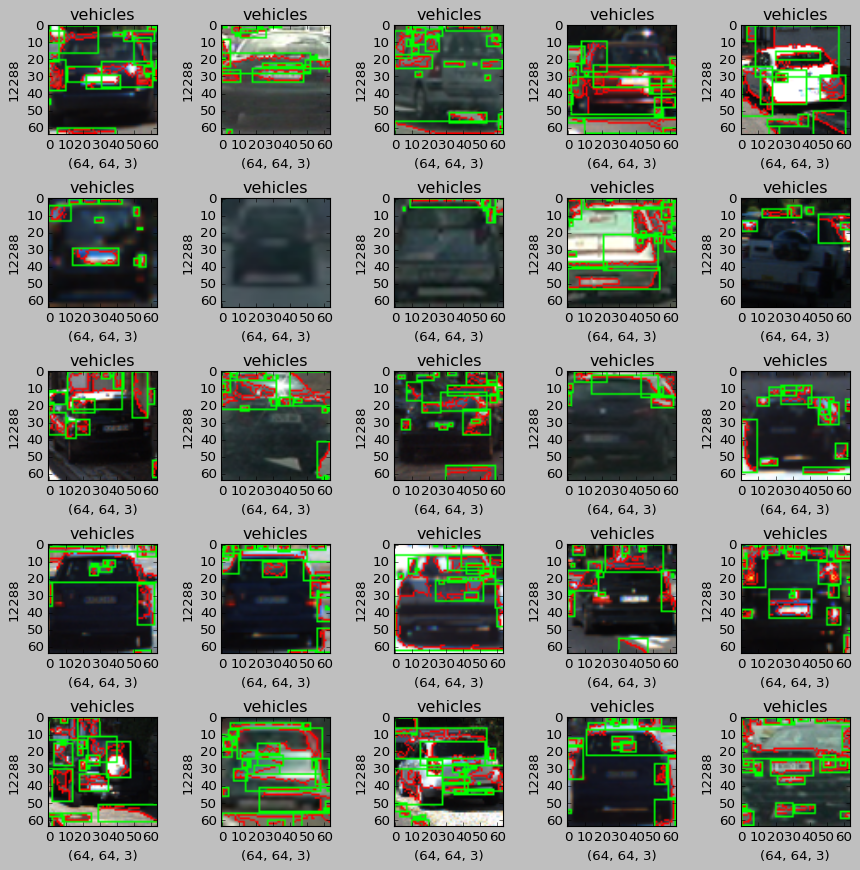

In [25]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = V_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    _,Thre_Img = cv2.threshold(Exp_Im,100,255,cv2.THRESH_TOZERO_INV)
    C_IMG = cv2.Canny(Thre_Img,90,450)
    contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    Draw_Img = cv2.drawContours(Exp_Im,contours,-1,(255,0,0),1)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(Draw_Img,(x,y),(x+w,y+h),(0,255,0),1)
        
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

# IMAGE GENERATOR PROCESS

#### GENERATOR STRUCTURE

In [26]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
                                        shear_range=0.2,
                                        zoom_range=0.1,
                                        brightness_range=[0.2,0.8],
                                        horizontal_flip=True,
                                        validation_split=0.1)

In [27]:
Test_Image_Generator = ImageDataGenerator(rescale=1./255)

#### HOW TO LOOK BY GENERATOR

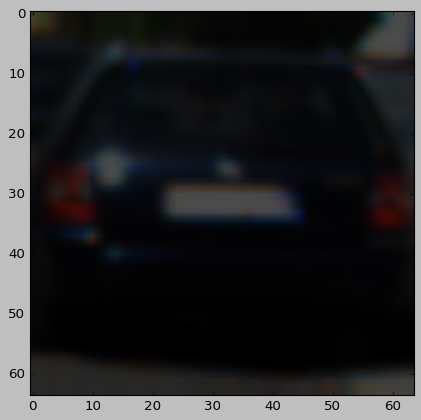

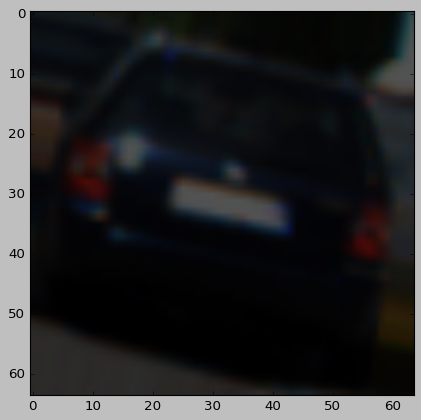

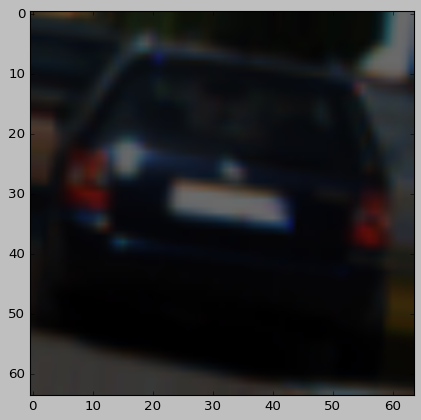

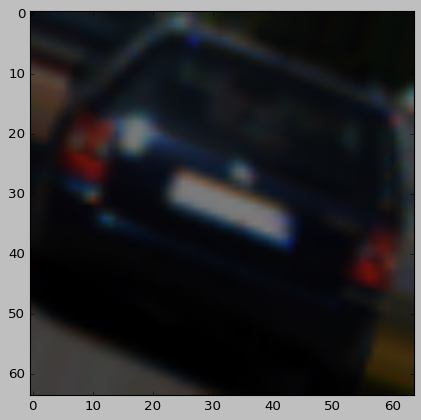

In [28]:
Example_Image = Main_Data["PNG"][2]
Load_Image = image.load_img(Example_Image,target_size=(64,64))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,)+Array_Image.shape)

i = 0

for batch in Train_IMG_Generator.flow(Array_Image,batch_size=32):
    plt.figure(i)
    Image = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### APPLYING

In [29]:
Train_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   subset="training")

Found 15984 validated image filenames belonging to 2 classes.


In [30]:
Validaiton_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   subset="validation")

Found 1776 validated image filenames belonging to 2 classes.


In [31]:
Test_Set = Test_Image_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   shuffle=False)

Found 17760 validated image filenames belonging to 2 classes.


In [32]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validaiton_Set.class_indices)
print(Validaiton_Set.classes[0:5])
print(Validaiton_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'no_vehicles': 0, 'vehicles': 1}
[0, 1, 0, 1, 1]
(64, 64, 3)
------------------------------------------------------------
VALIDATION: 
{'no_vehicles': 0, 'vehicles': 1}
[0, 0, 1, 0, 1]
(64, 64, 3)
------------------------------------------------------------
TEST: 
{'no_vehicles': 0, 'vehicles': 1}
[0, 0, 1, 0, 1]
(64, 64, 3)


# MODEL

#### STRUCTURE

In [33]:
Model = Sequential()

Model.add(SeparableConv2D(12,(3,3),activation="relu",
                 input_shape=(64,64,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(SeparableConv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))


#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model.add(Bidirectional(GRU(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))

In [34]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 62, 62, 12)        75        
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 12)        48        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 12)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 31, 31, 24)        420       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 24)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 24)        0         
_________________________________________________________________
time_distributed (TimeDistri (None, 15, 360)           0

In [35]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [36]:
Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [37]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validaiton_Set,
                      callbacks=Call_Back,
                      epochs=50)

Epoch 1/50
500/500 [==============================] - 164s 306ms/step - loss: 0.3578 - accuracy: 0.8308 - val_loss: 1.0906 - val_accuracy: 0.6593
Epoch 2/50
500/500 [==============================] - 73s 145ms/step - loss: 0.1403 - accuracy: 0.9458 - val_loss: 0.1416 - val_accuracy: 0.9459
Epoch 3/50
500/500 [==============================] - 72s 144ms/step - loss: 0.1149 - accuracy: 0.9570 - val_loss: 0.0793 - val_accuracy: 0.9735
Epoch 4/50
500/500 [==============================] - 72s 145ms/step - loss: 0.0881 - accuracy: 0.9657 - val_loss: 0.0727 - val_accuracy: 0.9718
Epoch 5/50
500/500 [==============================] - 78s 155ms/step - loss: 0.0762 - accuracy: 0.9718 - val_loss: 0.2824 - val_accuracy: 0.9234
Epoch 6/50
500/500 [==============================] - 73s 147ms/step - loss: 0.0650 - accuracy: 0.9764 - val_loss: 0.0440 - val_accuracy: 0.9837
Epoch 7/50
500/500 [==============================] - 74s 147ms/step - loss: 0.0506 - accuracy: 0.9833 - val_loss: 0.0364 - val_a

In [38]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

555/555 [==============================] - 24s 44ms/step - loss: 0.0243 - accuracy: 0.9917
LOSS:  0.0243
ACCURACY:  0.99


In [39]:
Model.save("./Last_Model")

In [40]:
Model.save("Prediction_Model.h5")

In [41]:
Model.save_weights("Model_Weights.h5")

#### CONTROL

<AxesSubplot:>

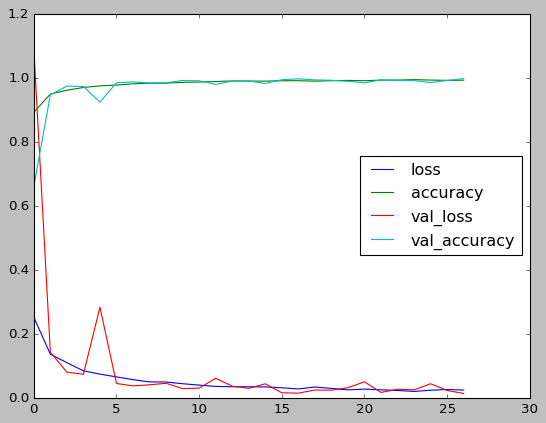

In [56]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

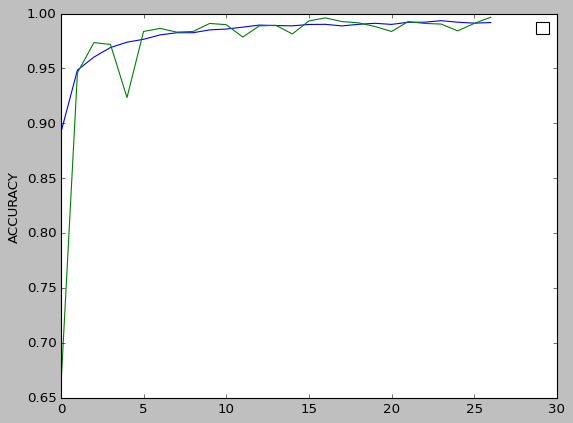

In [60]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

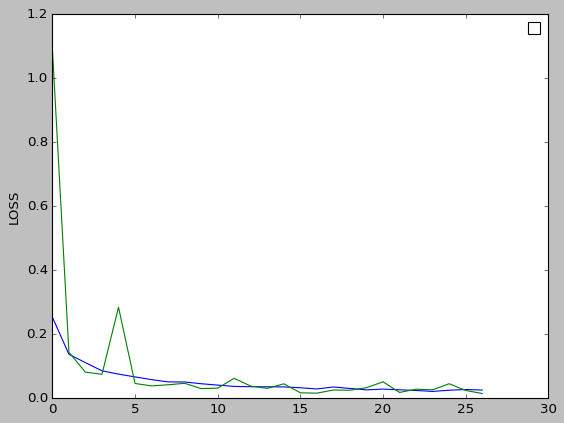

In [61]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

#### PREDICTION

In [45]:
Test_Prediction = Model.predict(Test_Set)
Test_Prediction_Class = Model.predict_classes(Test_Set)

In [46]:
print(Test_Prediction)

[[2.2744286e-09]
 [9.1733334e-08]
 [1.0000000e+00]
 ...
 [1.0973306e-07]
 [3.7121386e-06]
 [1.0000000e+00]]


In [47]:
Test_Prediction = Test_Prediction.argmax(axis=-1)

In [48]:
print(Test_Prediction)

[0 0 0 ... 0 0 0]


In [49]:
print(Test_Prediction_Class)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


* VEHICLE --> 1
* NO VEHICLE --> 0

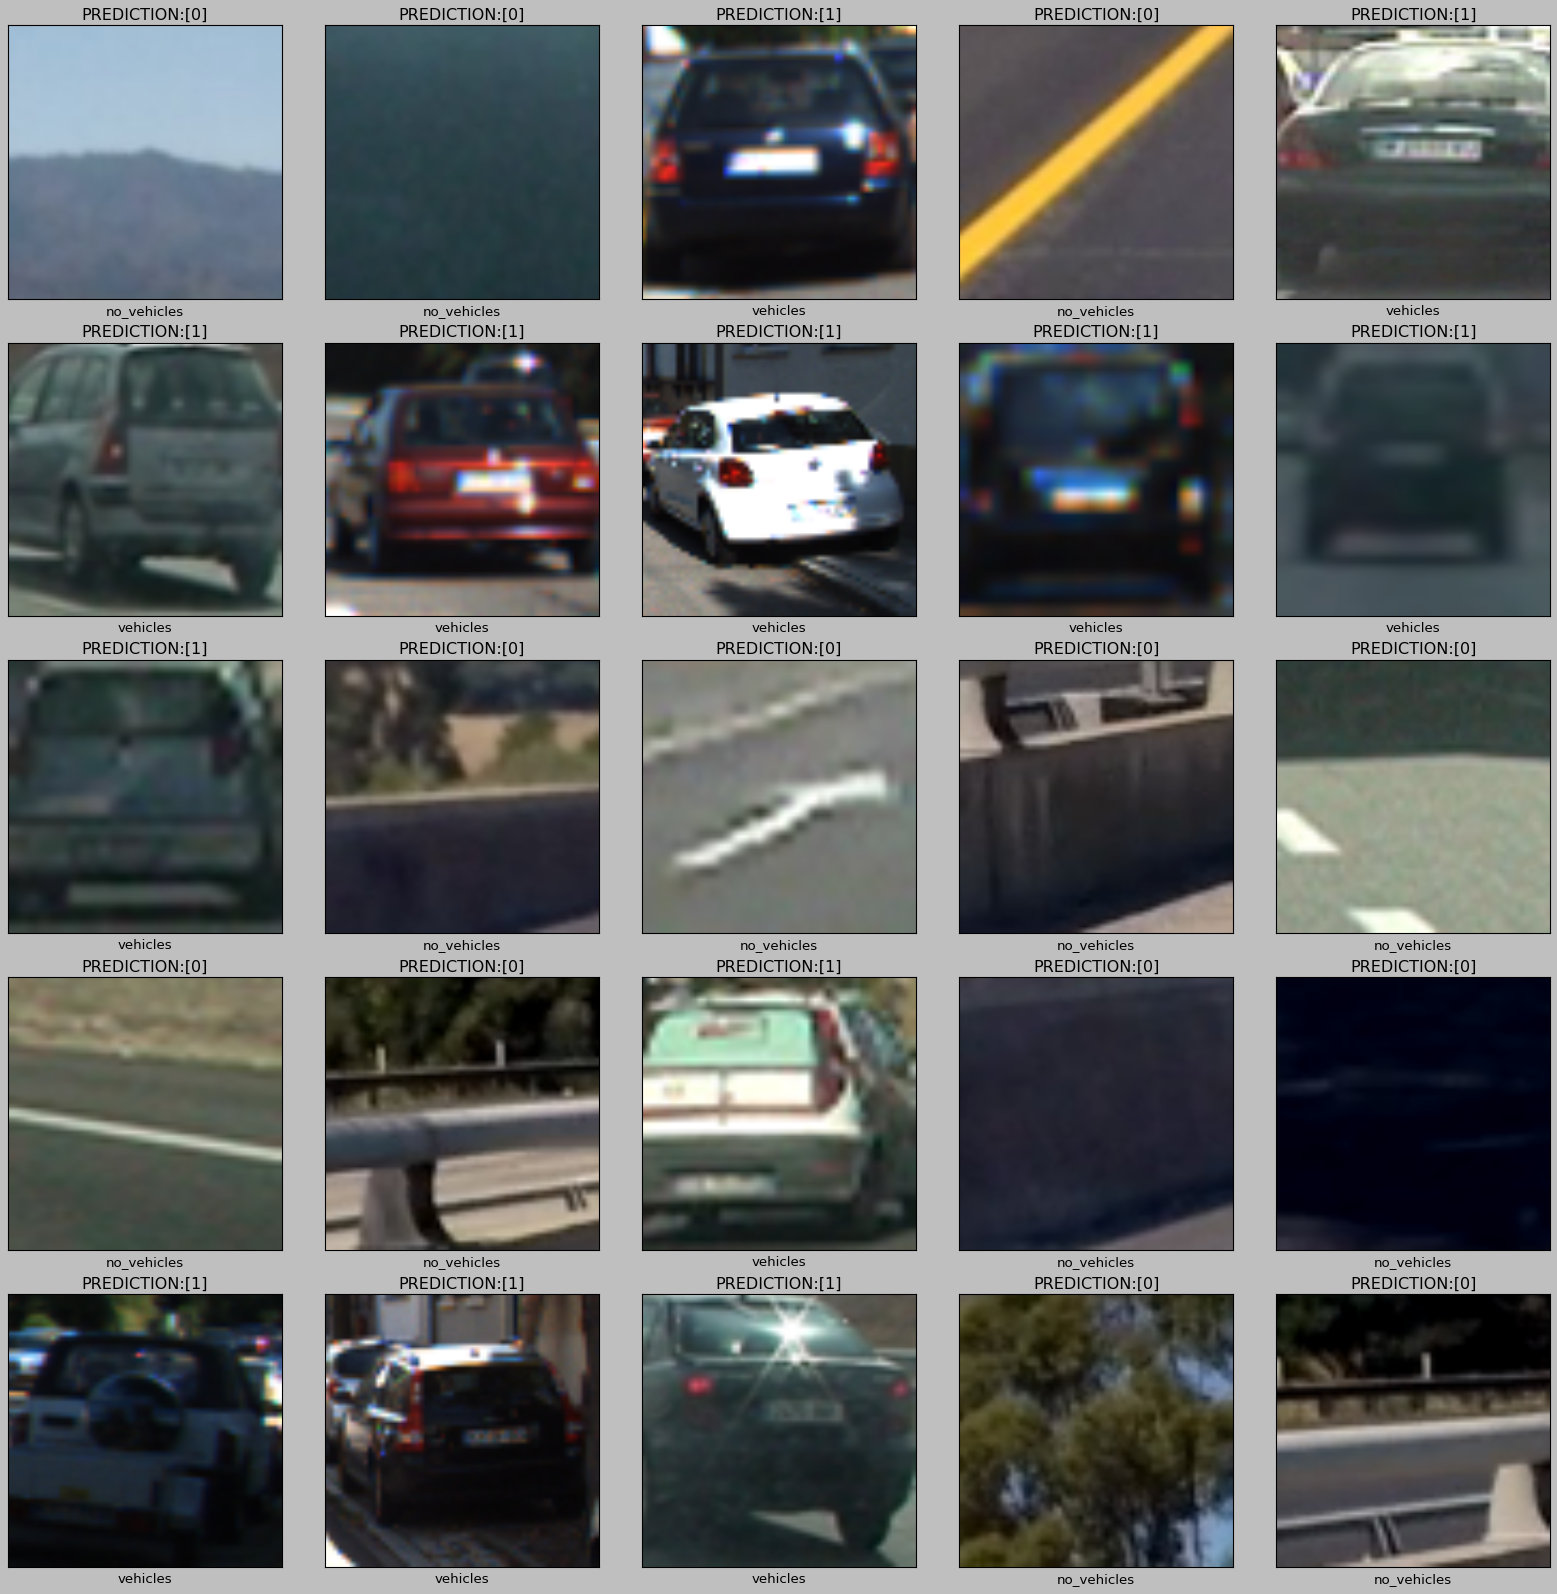

In [50]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["PNG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Test_Prediction_Class[i]}")
    ax.set_xlabel(Main_Data["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()

#### SPECIAL PREDICTION

In [51]:
v_img = "../input/vehicle-detection-image-set/data/vehicles/1.png"

In [52]:
non_v = "../input/vehicle-detection-image-set/data/non-vehicles/extra1039.png"

In [53]:
def searching_vehicle(img):
    Main_Img = cv2.imread(img)
    Array_Cr = np.asarray(Main_Img)
    Array_Cr = Array_Cr.reshape(1,Array_Cr.shape[0],Array_Cr.shape[1],Array_Cr.shape[2])
    heating = Model.predict_classes(Array_Cr)
    
    if heating[0][0] == 1:
        
        canny_Im = cv2.Canny(Main_Img,90,450)
        contours,_ = cv2.findContours(canny_Im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        Draw_Img = cv2.drawContours(Main_Img,contours,-1,(255,0,0),1)
        plt.imshow(Draw_Img)
        
    elif heating[0][0] == 0:
        print("NO VEHICLE")

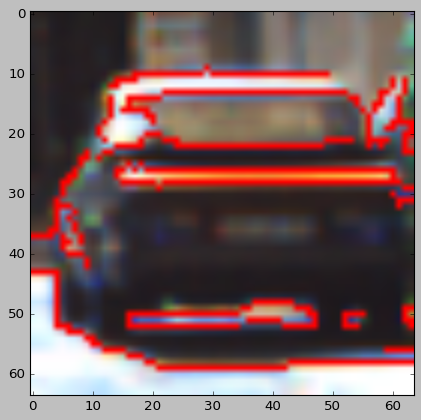

In [54]:
searching_vehicle(v_img)

In [55]:
searching_vehicle(non_v)

NO VEHICLE
